In [1]:
# data analysis libraries
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [62]:
# import train and test dataset

train = pd.read_csv('/train.csv')
test = pd.read_csv('/test.csv')

In [63]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data Analysis

In [66]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [67]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
191,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.5500,NaN,S
402,403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S


In [68]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Jarvis, Mr. John Denzil",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [69]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
(train.isnull().mean()) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## Data Visualization

Sex Feature

Percentage of male who survived  18.890814558058924
Percentage of female who survived  74.20382165605095


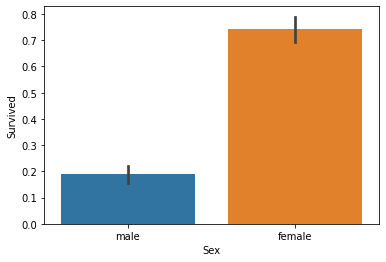

In [71]:
# draw a barplot to visualise the no of survivors on the basis of sex
sns.barplot(x = "Sex", y = "Survived", data = train)
print('Percentage of male who survived ', train['Survived'][train['Sex'] == 'male'].value_counts(normalize = True)[1] * 100)
print('Percentage of female who survived ', train['Survived'][train['Sex'] == 'female'].value_counts(normalize = True)[1] * 100)

In [72]:
print('Percentage of male who survived', train['Survived'][train['Sex'] == 'male'].value_counts(normalize = True)[1] * 100)

Percentage of male who survived 18.890814558058924


Pclass Feature

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


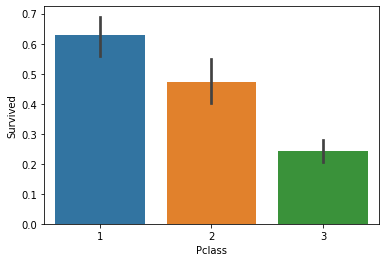

In [73]:
# making a barplot for no of survivors on the basis of Pclass
sns.barplot(x = 'Pclass', y = 'Survived', data = train)

# finding the %age of survivors with Pclass as 1
print('Percentage of Pclass = 1 who survived:', train['Survived'][train['Pclass'] == 1].value_counts(normalize = True)[1] * 100)

# finding the %age of survivors with Pclass as 2
print('Percentage of Pclass = 2 who survived:', train['Survived'][train['Pclass'] == 2].value_counts(normalize = True)[1] * 100)

# finding the %age of survivors with Pclass as 3
print('Percentage of Pclass = 3 who survived:', train['Survived'][train['Pclass'] == 3].value_counts(normalize = True)[1] * 100)

In [74]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

SibSp Feature

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


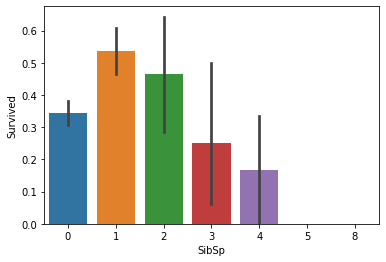

In [75]:
# draw a barplot to visualize the no of survivors on the basis of no of siblings and spouse
sns.barplot(x = 'SibSp', y = 'Survived', data = train)

# finding the %age of survivors with sibsp as 0
print('Percentage of SibSp = 0 who survived:', train['Survived'][train['SibSp'] == 0].value_counts(normalize = True)[1] * 100)

# finding the %age of survivors with sibsp as 1
print('Percentage of SibSp = 1 who survived:', train['Survived'][train['SibSp'] == 1].value_counts(normalize = True)[1] * 100)

# finding the %age of survivors with SibSp as 2
print('Percentage of SibSp = 2 who survived:', train['Survived'][train['SibSp'] == 2].value_counts(normalize = True)[1] * 100)

In [76]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Parch Feature

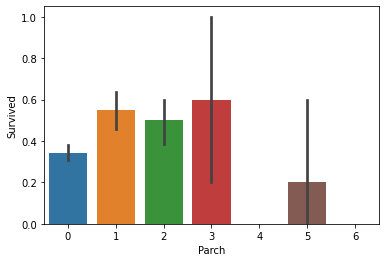

In [77]:
sns.barplot(x = 'Parch', y = 'Survived', data = train)
plt.show()

In [78]:
# sorting the ages into logical categories
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 25, 45, 60, np.inf]
labels = ['Unknown', 'Babies', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins, labels = labels)
test['AgeGroup'] = pd.cut(test['Age'], bins, labels = labels)

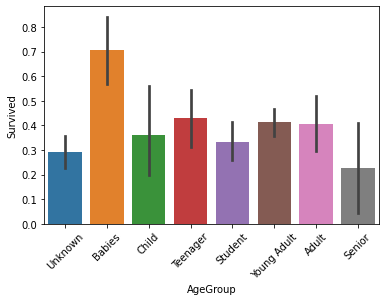

In [79]:
# drawing a barplot od age vs survival
sns.barplot(x= 'AgeGroup', y = 'Survived', data = train)
plt.xticks(rotation = 45)
plt.show()

Cabin feature

Percentage of Cabin holders who survived: 66.66666666666666
Percentage of Non Cabin holders who survived: 29.985443959243085


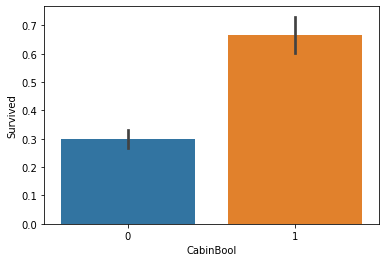

In [80]:
train['CabinBool'] = train['Cabin'].notnull().astype('int')
test['CabinBool'] = test['Cabin'].notnull().astype('int')

# Calculate %age of CabinBool vs Survived
print('Percentage of Cabin holders who survived:', train['Survived'][train['CabinBool'] == 1].value_counts(normalize = True)[1] * 100)
print('Percentage of Non Cabin holders who survived:', train['Survived'][train['CabinBool'] == 0].value_counts(normalize = True)[1] * 100)

# Draw a barplot of cabinBool vs Survived
sns.barplot(x = 'CabinBool', y = 'Survived', data = train)
plt.show()

## Data Cleaning
Time to clean our data to account for missing values and unnecessary information

In [81]:
# Looking at the test data
test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"McCaffry, Mr. Thomas Francis",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,138,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
 11  AgeGroup     418 non-null    category
 12  CabinBool    418 non-null    int64   
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 40.1+ KB


In [83]:
(test['Age']==-0.5).value_counts(normalize = True) * 100

False    79.425837
True     20.574163
Name: Age, dtype: float64

In [84]:
train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
              ..
E38            1
C62 C64        1
C101           1
D21            1
D28            1
Name: Cabin, Length: 147, dtype: int64

In [85]:
train.drop(['Ticket'], axis = 1, inplace=True)

In [86]:
train.drop(['Cabin'], axis = 1, inplace = True)

In [87]:
test.drop(['Ticket'], axis =1, inplace=True)

In [88]:
test.drop(['Cabin'], axis = 1, inplace = True)

Embarked Feature

In [89]:
print('No of people embarking in Southampton')
Southampton = (train['Embarked'] == 'S').value_counts()[1]
print(Southampton)
print('No of people embarking in Cherboung')
Cherboung = (train['Embarked'] == 'C').value_counts()[1]
print(Cherboung)
print('No of people embarking in Queenstown')
Queenstown = (train['Embarked'] == 'Q').value_counts()[1]
print(Queenstown)

No of people embarking in Southampton
644
No of people embarking in Cherboung
168
No of people embarking in Queenstown
77


In [90]:
(train['Embarked'] == 'S').value_counts()[1]

644

In [91]:
(train['Embarked'] == 'C').value_counts()[1]

168

In [92]:
(train['Embarked'] == 'Q').value_counts()[1]

77

In [93]:
train[train['Embarked'] == 'S'].shape[0]

644

In [94]:
train['Embarked'].value_counts().sum()

889

In [95]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
AgeGroup       0
CabinBool      0
dtype: int64

In [96]:
# Replacing the null values in the Embarked feature with S
train.fillna({'Embarked' : 'S'}, inplace = True)

In [97]:
# Combine train and test dataset
combine = [train, test]

In [98]:
# extract a title for each name in the train and test dataset
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [99]:
# replace title with more common names
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Jonkheer', 'Rev', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [100]:
# mapping each title to a number
title_map = {'Mr' : 1, 'Mrs' : 2, 'Miss' : 3, 'Master' : 4, 'Rare' : 5, 'Royal' : 6}

for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_map)
  dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Young Adult,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [101]:
mr_age = train[train['Title'] == 1]['AgeGroup'].mode() # Young Adult
mrs_age = train[train['Title'] == 2]['AgeGroup'].mode() # Young Adult
miss_age = train[train['Title'] == 3]['AgeGroup'].mode() # Young Adult
master_age = train[train['Title'] == 4]['AgeGroup'].mode() # Babies
rare_age = train[train['Title'] == 5]['AgeGroup'].mode() # Adult
royal_age = train[train['Title'] == 6]['AgeGroup'].mode() # Adult

age_title_mapping = {1 : 'Young Adult', 2 : 'Young Adult', 3 : 'Young Adult', 4 : 'Babies', 5 : 'Adult', 6 : 'Adult'}


In [102]:
for x in range(len(train['AgeGroup'])):
  if train['AgeGroup'][x] == 'Unknown':
    train['AgeGroup'][x] = age_title_mapping[train['Title'][x]]

for x in range(len(test['AgeGroup'])):
  if test['AgeGroup'][x] == 'Unknown':
    test['AgeGroup'][x] = age_title_mapping[train['Title'][x]]

In [103]:
train[train['Title'] == 6]['AgeGroup'].value_counts()

Adult          1
Young Adult    1
Senior         0
Student        0
Teenager       0
Child          0
Babies         0
Unknown        0
Name: AgeGroup, dtype: int64

In [104]:
len(train['AgeGroup'])

891

In [105]:
age_title_mapping[train['Title'][5]]

'Young Adult'

In [106]:
train['Title'][5]

1

In [107]:
train['AgeGroup'][6]

'Adult'

In [108]:
age_title_mapping[1]

'Young Adult'

In [109]:
# map each age value to a numerical value
age_mapping = {'Babies' : 1, 'Child' : 2, 'Teenager' : 3, 'Student' : 4, 'Young Adult' : 5, 'Adult' : 6, 'Senior' : 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)
train.head()

#dropping the age column
train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis = 1, inplace=True)

In [110]:
# dropping the name feature from the dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [111]:
# map each sex value to a numerical value
sex_mapping = {'male' : 0, 'female' : 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,5.0,1,2
2,3,1,3,1,0,0,7.9250,S,5.0,0,3
3,4,1,1,1,1,0,53.1000,S,5.0,1,2
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


In [112]:
# map the embarked feature into numerical values
embarked_mapping = {'S' : 1, 'Q' : 2, 'C' : 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,3,5.0,1,2
2,3,1,3,1,0,0,7.9250,1,5.0,0,3
3,4,1,1,1,1,0,53.1000,1,5.0,1,2
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


In [113]:
train['Fare'][train['Pclass'] == 3].mean()

13.675550101832997

In [114]:
test[test['Fare'].isnull() == True]

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
152,1044,3,0,0,0,NaN,1,7.0,0,1


In [115]:
test['Fare'][152]

nan

In [116]:
test['Fare'].isna().value_counts()

False    417
True       1
Name: Fare, dtype: int64

In [117]:
train[train['Pclass'] == 3]['Fare'].mean()

13.675550101832997

In [119]:
for x in range(len(test['Fare'])):
  if pd.isnull(test['Fare'][x]):
    pclass = test['Pclass'][x] # Pclass = 3
    test['Fare'][x] = round(test['Fare'][test['Pclass'] == pclass].mean(), 4)

# map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

# dropping the Fare column from both datasets
train.drop('Fare', axis=1, inplace=True)
test.drop('Fare', axis =1, inplace=True)

In [118]:
test[test['Pclass'] == 3]['Fare'].mean()

12.459677880184334

In [120]:
# check train data
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,3,5.0,1,2,4
2,3,1,3,1,0,0,1,5.0,0,3,2
3,4,1,1,1,1,0,1,5.0,1,2,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [121]:
# check test data
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,2,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,2,1
2,894,2,0,0,0,2,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,2,2


## Choosing the best Model

Splitting The data

In [122]:
from sklearn.model_selection import train_test_split
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train['Survived']

x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

Testing different models

I will be testing the following models with my training data


*   Gaussian Naive Bayes
*   Logistic Regression
*   Support Vector Machines
*   Perceptron
*   Decision Tree Classifier
*   Random Forest Classifier
*   KNN or k-Nearest Neighbors
*   Stochastic Gradient Descent
*   Gradient Boosting Classifier

For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

In [123]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [124]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [125]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.7


In [126]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

81.22


In [127]:
# Linear SVC
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(x_train, y_train)
y_pred = lsvc.predict(x_val)
acc_lsvc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_lsvc)

78.68


In [128]:
# Perceptron
from sklearn.linear_model import Perceptron

perc = Perceptron()
perc.fit(x_train, y_train)
y_pred = perc.predict(x_val)
acc_perc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perc)

78.68


In [129]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred = DecisionTree.predict(x_val)
acc_DT = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_DT)

83.25


In [130]:
# Random Tree
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred = RFC.predict(x_val)
acc_RFC = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_RFC)

84.26


In [131]:
# KNN or K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

KNNC = KNeighborsClassifier()
KNNC.fit(x_train, y_train)
y_pred = KNNC.predict(x_val)
acc_KNNC = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_KNNC)

82.23


In [132]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()
sgdc.fit(x_train, y_train)
y_pred = sgdc.predict(x_val)
acc_sgdc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgdc)

80.71


In [133]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_val)
acc_gbc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbc)

84.26


In [135]:
y_pred.shape[0]

197

In [136]:
models = pd.DataFrame({
    'Model' : ['Gaussian Naive Bayes', 'Logistic Regression', 'Support Vector Machines',\
               'Linear SVC', 'Perceptron', 'Decision Tree Classifier', 'Random Forest Classifier',\
               'KNN or k-Nearest Neighbors', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score' : [acc_gaussian, acc_logreg, acc_svc, acc_lsvc, acc_perc, acc_DT, acc_RFC, acc_KNNC, acc_sgdc, acc_gbc]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,Random Forest Classifier,84.26
9,Gradient Boosting Classifier,84.26
5,Decision Tree Classifier,83.25
7,KNN or k-Nearest Neighbors,82.23
2,Support Vector Machines,81.22
8,Stochastic Gradient Descent,80.71
1,Logistic Regression,79.70
0,Gaussian Naive Bayes,78.68
3,Linear SVC,78.68
4,Perceptron,78.68


## Creating Submission File

In [146]:
# set ids as Passenger Id and predict Survival
ids = test['PassengerId']
prediction = gbc.predict(test.drop('PassengerId', axis = 1))

# Set the output as DataFrame and convert to csv file named Submission.csv
output = pd.DataFrame({'PassengerId' : ids, 'Survival' : prediction})
output.to_csv('/Submission.csv', index = False)

In [140]:
q = pd.read_csv('Submission.csv')
q

,PassengerId,Survival
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
